# **2 - RFM Segmentation**

Marketing and Customer Analytics

---

**Outline**

1. Business Understanding
2. Modelling Workflow
3. Data Pipelines
4. EDA
5. Preprocessing
6. Clustering
7. Business Recommendation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'>**1. Business Understanding**</font>
---

Company ZYX wants to create targeted marketing campaigns and also needs to allocate their marketing resources efficiently, but Company ZYX recognizes that not all customers have the same needs, preferences, or purchasing behaviors

### **Business Questions / Problem Statement**
---

- How can we effectively segment our customer base to better understand customer behavior and implement targeted marketing strategies?

### **Define the Problem**
---

1. **What are the inputs?** Purchasing behavior records: recency, frequency, and monetary.
2. **What are the outputs?** Customer segments
3. **What do we do with the segmentation?** Marketing team will treat each segment based on their characteristics, e.g. create a loyalty coupon

### **Modelling Task**
---
- **Task:**
  - Clustering
- **Model used:**
  - Ranking based
  - K-means
- **Cluster Evaluation:**
  - Elbow method

  # **<font color='Blue'>2. Modelling Workflow </font>**
---

## **Machine Learning Workflow** (Simplified)
---

### 1. <font color='blue'> Importing Data to Python</font>
    * Data validation
### 2. <font color='blue'> Exploratory Data Analysis</font>
    * Data exploration
### 3. <font color='blue'> Data Preprocessing</font>
    * Missing value handling, feature engineering, and normalization
### 4. <font color='blue'> Modeling</font>
    * Finding best model
### 5. <font color='blue'> Recommendation</font>
    * Business recommendation and Actionable insights

    

# <font color='Blue'> **3. Importing data to Python** </font>
---

## **3.1 Data Description**
---
- `Invoice`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
<br><br>
- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br><br>
- `Description`: Product (item) name. Nominal. <br><br>
- `Quantity`: The quantities of each product (item) per transaction. Numeric. <br><br>
- `InvoiceDate`: Invice Date and time. Numeric, the day and time when each transaction was generated. <br><br>
- `Price`: Unit price. Numeric, Product price per unit in sterling. <br><br>
- `Customer ID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br><br>
- `Country`: Country name. Nominal, the name of the country where each customer resides. <br><br>

### **Preprocessed data:**
---
- **Frequency** <br>
It measures how often a customer engages with the business. Frequency = Count number of transactions customer

- **Tenure** <br>
It refers the ‘age’ of the customers being our customer. Tenure = First cust. purchase date - last cust. purchase date

- **Recency** <br>
It measures how recently a customer has engaged with the business. Recency = Reference date (e.g., today) - Customer last purchase date

- **Monetary** <br>
It refers to the total monetary value of a customer's transactions or purchases. Monetary = Product Price * Quantity Order

## **3.2 Import Data**
---



In [2]:
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        input path

    Returns
    -------
    df : pandas Dataframe
        Sample dataframe
    """
    data = pd.read_csv(path,
                       index_col = 0,
                       low_memory = False)

    data = data.drop_duplicates()
    print('Data shape :', data.shape)

    return data


In [3]:
data = read_data(path = 'retail_uk.csv')

Data shape : (26170, 7)


In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.dtypes

,0
Invoice,int64
StockCode,object
Description,object
Quantity,float64
InvoiceDate,object
Price,float64
Customer ID,float64


# <font color='Blue'> **4. Exploratory Data Analysis** </font>
---

In [7]:
eda_data = data.copy()

print('Original data shape :', data.shape)
print('EDA data shape      :', eda_data.shape)

Original data shape : (26170, 7)
EDA data shape      : (26170, 7)


### **4.1. Check for data descriptions**
---

In [8]:
eda_data.describe()

,Invoice,Quantity,Price,Customer ID
count,26170.000000,26169.000000,26169.000000,18453.000000
mean,490780.360069,6.925446,4.685324,15637.790820
std,799.675903,24.992979,19.205074,1589.745543
min,489434.000000,1.000000,1.050000,12346.000000
25%,490074.000000,1.000000,1.700000,14298.000000
50%,490741.000000,2.000000,2.950000,15750.000000
75%,491465.000000,6.000000,5.170000,17044.000000
max,492224.000000,1080.000000,1213.020000,18276.000000


### **4.2. Check for missing values**
---



In [9]:
eda_data.isna().sum()

,0
Invoice,0
StockCode,0
Description,1
Quantity,1
InvoiceDate,1
Price,1
Customer ID,7717


In [10]:
eda_data[eda_data['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
1027,489548,22271,FELTCRAFT DOLL ROSIE,1.0,2009-12-01 12:32:00,2.95,NaN
1028,489548,22254,FELT TOADSTOOL LARGE,12.0,2009-12-01 12:32:00,1.25,NaN
1029,489548,22273,FELTCRAFT DOLL MOLLY,3.0,2009-12-01 12:32:00,2.95,NaN
1030,489548,22195,LARGE HEART MEASURING SPOONS,1.0,2009-12-01 12:32:00,1.65,NaN
1031,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2.0,2009-12-01 12:32:00,1.95,NaN
...,...,...,...,...,...,...,...
32702,492134,22303,COFFEE MUG APPLES DESIGN,2.0,2009-12-15 14:19:00,2.55,NaN
32703,492134,22302,COFFEE MUG PEARS DESIGN,2.0,2009-12-15 14:19:00,2.55,NaN
32704,492134,84968B,S/16 VINTAGE IVORY CUTLERY,1.0,2009-12-15 14:19:00,12.75,NaN
32707,492134,21781,MA CAMPAGNE CUTLERY BOX,1.0,2009-12-15 14:19:00,14.95,NaN


In [11]:
print('Shape before dropping NA :', eda_data.shape)

eda_data = eda_data[~eda_data['Customer ID'].isna()]

print('Shape after dropping NA  :', eda_data.shape)

Shape before dropping NA : (26170, 7)
Shape after dropping NA  : (18453, 7)


In [12]:
eda_data.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0


### **4.3. Check for `Invoice`**
---

In [13]:
eda_data['Invoice'].value_counts()

,count
Invoice,
490957,135
491113,107
491634,100
491406,97
489536,97
...,...
492021,1
489584,1
489606,1


In [14]:
eda_data[eda_data['Invoice'] == '576339']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID


In [15]:
eda_data[eda_data['Invoice'] == '576339']['InvoiceDate'].value_counts()

,count
InvoiceDate,


In [16]:
len(set(eda_data['Customer ID']))

775

### **4.5. Check `InvoiceDate`**
---

In [17]:
print(f'First Transaction : {str(eda_data["InvoiceDate"].min())}')
print(f'Last Transaction  : {str(eda_data["InvoiceDate"].max())}')

First Transaction : 2009-12-01 07:45:00
Last Transaction  : 2009-12-15 18:22:00


### **4.6. Create RFM features**
---

In [18]:
LATEST_DATE = pd.to_datetime('2011-12-15')

LATEST_DATE

Timestamp('2011-12-15 00:00:00')

In [27]:
# Define some functions
def calculate_recency(x):
    """Calculate the recency (days) based on the reference date"""
    # Convert x to datetime before calculating recency
    x = pd.to_datetime(x)
    return (LATEST_DATE - x.max()).days

def calculate_tenure(x):
    """Calculate the tenure (days) based on the reference date"""
    # Convert x to datetime before calculating tenure
    x = pd.to_datetime(x)
    return (x.max() - x.min()).days

def calculate_frequency(x):
    """Calculate the frequency based on the latest date"""
    return len(set(x))

def generate_rfmts(data):
    """
    Function to generate the RFM + TS data

    Parameter
    ---------
    data : pandas Dataframe
        The sample data

    Return
    ------
    rfmts_data : pandas Dataframe
        The RFM + TS data
    """
    # 1. Create sales data --> sales = quantity x price
    data['Sales'] = data['Quantity'] * data['Price']

    # 2. Groupby by `Customer ID` to generate the RFM + TS data
    agg_dict = {
        'InvoiceDate': [calculate_recency, calculate_tenure],
        'Invoice': calculate_frequency,
        'Sales': 'sum'
    }
    data_rfmts = data.groupby('Customer ID').agg(agg_dict)

    # 3. Rename columns
    data_rfmts.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    # 4. Change index type
    data_rfmts.index = data_rfmts.index.astype('int')

    return data_rfmts

In [28]:
eda_rfm_data = generate_rfmts(data = eda_data)

# Validate
# rows of eda_rfm_data == number of unique customer ID
print('RFM data shape :', eda_rfm_data.shape)
assert eda_rfm_data.shape[0] == len(set(eda_data['Customer ID']))

RFM data shape : (775, 4)


In [29]:
eda_rfm_data.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346,730,0,3,90.00
12747,735,1,2,683.85
12748,729,11,3,821.04
12820,739,0,1,148.30
12835,730,11,4,936.01


## **EDA - PART 2**
---

### **4.7. Check for data description**
---

In [30]:
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,775.000000,775.000000,775.000000,775.000000
mean,735.895484,1.418065,1.398710,554.911368
std,4.468745,3.297197,1.030415,1437.449012
min,729.000000,0.000000,1.000000,8.850000
25%,733.000000,0.000000,1.000000,171.515000
50%,736.000000,0.000000,1.000000,285.150000
75%,740.000000,0.000000,1.000000,525.640000
max,743.000000,14.000000,15.000000,31749.800000


### **4.8. Check for `Frequency`**
---

In [31]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1]

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12820,739,0,1,148.30
12836,743,0,1,397.77
12842,742,0,1,376.80
12843,731,0,1,61.80
12854,733,0,1,447.34
...,...,...,...,...
18260,729,0,1,308.38
18268,733,0,1,375.18
18271,736,0,1,192.55


In [32]:
eda_rfm_data[eda_rfm_data['Tenure'] == 0].sample(6)

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
15712,743,0,1,255.50
15812,729,0,1,229.21
16802,735,0,1,238.95
17246,743,0,1,8.85
12933,734,0,1,144.75
16705,735,0,1,2920.52


In [33]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1]['Monetary'].describe()

,Monetary
count,589.000000
mean,314.260594
std,301.740641
min,8.850000
25%,151.200000
50%,234.400000
75%,359.590000
max,2920.520000


In [34]:
# Filter data
eda_rfm_data = eda_rfm_data[eda_rfm_data['Frequency'] >= 2]

# validate
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,186.000000,186.000000,186.000000,186.000000
mean,733.053763,5.908602,2.661290,1316.972151
std,3.836850,4.336798,1.527516,2754.476894
min,729.000000,0.000000,2.000000,64.400000
25%,730.000000,1.250000,2.000000,392.912500
50%,733.000000,6.000000,2.000000,670.515000
75%,735.000000,9.000000,3.000000,1234.022500
max,743.000000,14.000000,15.000000,31749.800000


### **4.9. Data Distribution**
---

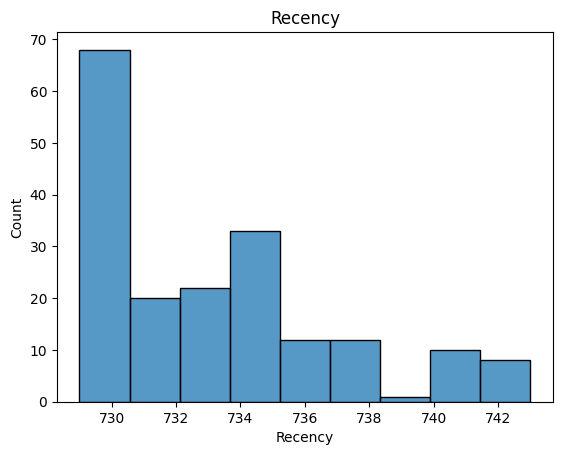

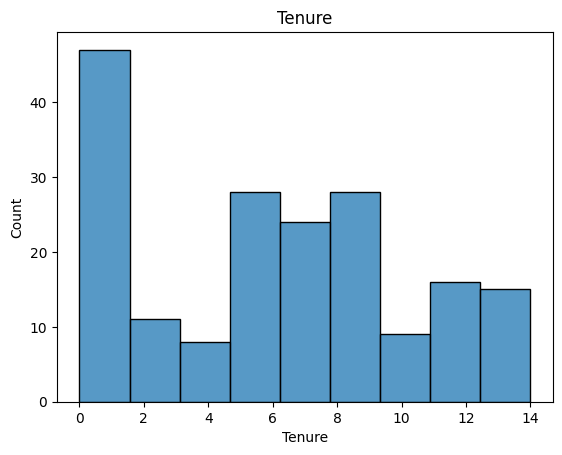

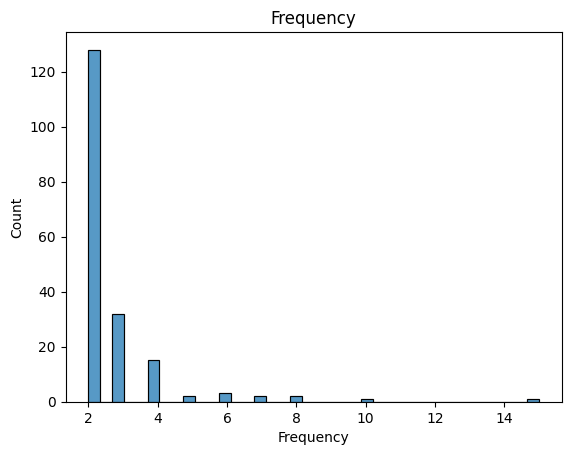

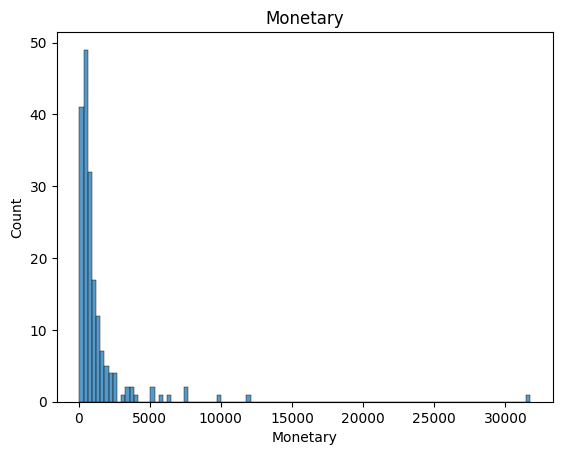

In [35]:
for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

In [36]:
# Drop the outlier
def drop_outlier(data, cols):
    """
    Function to drop outliers by IQR

    Parameters
    ----------
    data : pandas Dataframe
        The sample data

    cols : list
        Cols to clean

    Return
    ------
    data_clean : pandas Dataframe
        The clean sample data
    """
    # Copy data
    data_clean = data.copy()

    # Iterate
    for col in cols:
        # Find IQR
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5*iqr # upper bound
        lb = q1 - 1.5*iqr # lower bound

        # Filter data
        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    return data_clean


In [37]:
# Remove outlier
eda_rfm_data = drop_outlier(data = eda_rfm_data,
                            cols = ['Monetary', 'Frequency'])

# Validate
print('EDA data shape :', eda_rfm_data.shape)
eda_rfm_data.describe()

EDA data shape : (165, 4)


,Recency,Tenure,Frequency,Monetary
count,165.000000,165.000000,165.00000,165.000000
mean,733.212121,5.533333,2.30303,734.236970
std,3.935126,4.260616,0.57831,525.317095
min,729.000000,0.000000,2.00000,64.400000
25%,730.000000,0.000000,2.00000,359.040000
50%,733.000000,6.000000,2.00000,589.230000
75%,735.000000,9.000000,2.00000,963.820000
max,743.000000,14.000000,4.00000,2477.360000


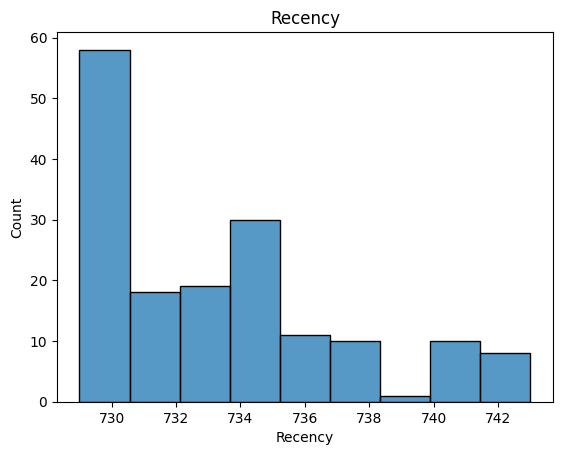

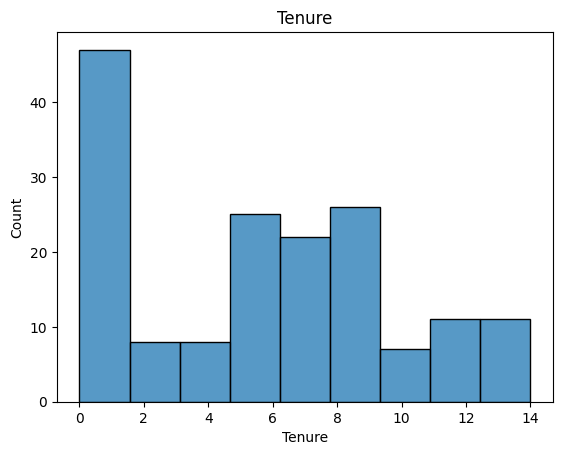

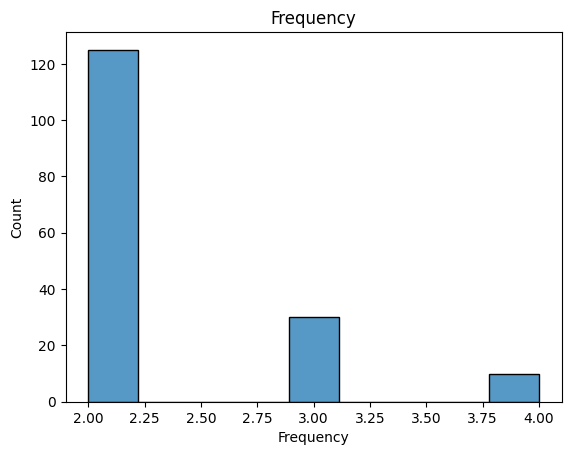

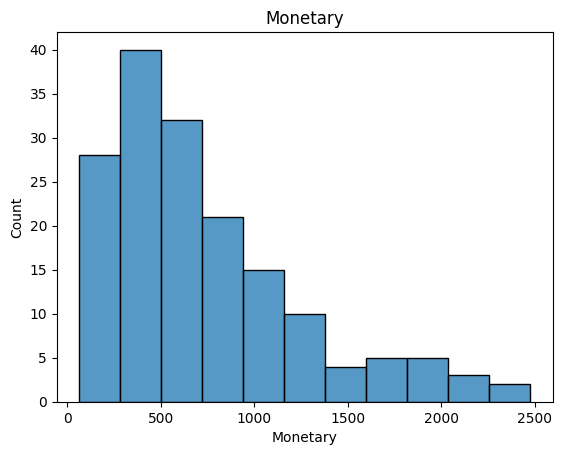

In [38]:
for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

# <font color ='Blue'> **5. Data Preprocessing** </font>
---

### **5.1. Preprocess raw data**
---

In [39]:
# Create some functions
def preprocess_raw(data):
    """
    Function to preprocess the raw data to RFM data

    Parameters
    ----------
    data : pandas DataFrame
        The sample raw data

    Returns
    -------
    data_rfm : pandas DataFrame
        The RFM data
    """
    # 1. Remove missing Customer ID
    data_raw = data[~data['Customer ID'].isna()]

    # 2. Create RFM ddata
    data_rfm = generate_rfmts(data = data_raw)

    # Validate RFM data
    print('RFM data shape :', data_rfm.shape)
    assert data_rfm.shape[0] == len(set(data_raw['Customer ID']))

    return data_rfm


In [40]:
# Get the RFM data
data_rfm = preprocess_raw(data = eda_data)

data_rfm.head()

RFM data shape : (775, 4)


,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346,730,0,3,90.00
12747,735,1,2,683.85
12748,729,11,3,821.04
12820,739,0,1,148.30
12835,730,11,4,936.01


### **5.2. Preprocess RFM data**
---

In [41]:
def preprocess_rfm(data_rfm):
    """
    Function to clean the RFM data

    Parameters
    ----------
    data_rfm : pandas DataFrame
        The sample rfm data

    Returns
    -------
    data_clean : pandas DataFrame
        The RFM data
    """
    # 1. filter Frequency
    data_freq = data_rfm[data_rfm['Frequency'] >= 2]

    # 2. Remove outlier
    data_clean = drop_outlier(data = data_freq,
                              cols = ['Monetary', 'Frequency'])

    # 3. Filter data
    data_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

    # Validate
    print('Data shape :', data_clean.shape)

    return data_clean


In [42]:
# Get the clean RFM data
data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

data_rfm_clean.describe()

Data shape : (165, 3)


,Recency,Frequency,Monetary
count,165.000000,165.00000,165.000000
mean,733.212121,2.30303,734.236970
std,3.935126,0.57831,525.317095
min,729.000000,2.00000,64.400000
25%,730.000000,2.00000,359.040000
50%,733.000000,2.00000,589.230000
75%,735.000000,2.00000,963.820000
max,743.000000,4.00000,2477.360000


### **5.3. Normalize Data**
---

Why we need to normalize data in clustering K-Means?
- K-Means algorithm uses Euclidean distance that is highly prone to irregularities in the size of various features
- Normalize data before K-Means to handle feature size differences and improve clustering accuracy.
<br><br>

Ref: Virmani, D. (2015, March 3). Normalization based K means Clustering Algorithm. arXiv.org. https://arxiv.org/abs/1503.00900

<br>

Why MinMaxScaler instead standardization? <br>
we can use this simple questions to determine which of the scaling method we'll use.

1. What is your data distribution?
2. Is your data free from outliers?
3. Does your data have to be transformed within a certain range?

Ans

1. If the answer is normal, use standardization, otherwise use min-max. Our data isn't normal --> minmaxscaler
2. if the answer has no outliers (we have removed them), use the min-max scaler (because standardization transform the outliers)
3. If the answer is no, we can use standardization or minmax, because min-max is transformed in the range [0, 1], for standardization the range can be different.




In [43]:
# Fit & transform scaler
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    Returns
    -------
    scaler : object
        The Min-Max scaler
    """
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    scaler : object
        The Min-Max scaler

    Returns
    -------
    data_clean : object
        The clean data
    """
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(data))
    data_clean.index = data.index
    data_clean.columns = data.columns

    # Validate
    print("Data shape :", data.shape)

    return data_clean


In [44]:
# Fit a scaler
scaler = fit_scaler(data = data_rfm_clean)

# Transform data
data_rfm_scaled = transform_scaler(data = data_rfm_clean,
                                   scaler = scaler)

data_rfm_scaled.head()


Data shape : (165, 3)


,Recency,Frequency,Monetary
Customer ID,,,
12346,0.071429,0.5,0.010609
12747,0.428571,0.0,0.256718
12748,0.000000,0.5,0.313573
12835,0.071429,1.0,0.361220
12839,0.071429,0.0,0.222863


In [45]:
data_rfm_scaled.describe()

,Recency,Frequency,Monetary
count,165.000000,165.000000,165.000000
mean,0.300866,0.151515,0.277600
std,0.281080,0.289155,0.217707
min,0.000000,0.000000,0.000000
25%,0.071429,0.000000,0.122107
50%,0.285714,0.000000,0.217505
75%,0.428571,0.000000,0.372746
max,1.000000,1.000000,1.000000


### **5.4. Create preprocessing pipeline**
---

In [46]:
def preprocess_data(data, scaler=None):
    """
    Function to preprocess the whole data

    Parameters
    ----------
    data : pandas DataFrame
        The raw sample data

    scaler : object, defatult=None
        The min-max scaler

    Returns
    -------
    data_clean : pandas DataFrame
        The clean data
    """
    # 1. Get the RFM data
    data_rfm = preprocess_raw(data = data)

    # 2. Get the clean RFM data
    data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

    # 3. Normalize data
    if scaler is None:
        # Create a scaler
        scaler = fit_scaler(data = data_rfm_clean)

    data_clean = transform_scaler(data = data_rfm_clean,
                                  scaler = scaler)

    # 4. Validate
    print('Data shape clean :', data_clean.shape)

    return data_clean, scaler


In [47]:
data_clean, scaler = preprocess_data(data = data)

<ipython-input-27-aca826b0ad6e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Quantity'] * data['Price']


RFM data shape : (775, 4)
Data shape : (165, 3)
Data shape : (165, 3)
Data shape clean : (165, 3)


In [48]:
data_clean.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,0.071429,0.5,0.010609
12747,0.428571,0.0,0.256718
12748,0.000000,0.5,0.313573
12835,0.071429,1.0,0.361220
12839,0.071429,0.0,0.222863


In [49]:
data_clean.describe()

,Recency,Frequency,Monetary
count,165.000000,165.000000,165.000000
mean,0.300866,0.151515,0.277600
std,0.281080,0.289155,0.217707
min,0.000000,0.000000,0.000000
25%,0.071429,0.000000,0.122107
50%,0.285714,0.000000,0.217505
75%,0.428571,0.000000,0.372746
max,1.000000,1.000000,1.000000


# <font color='Blue'> **6. Clustering** </font>
---

## **6.1 Ranking Method**
---

In [61]:
# Copy data
data_bin = data_clean.copy()

In [79]:
def binning_rfm(df):
    """
    Function for binning the data for making ranking method

    Parameter
    ---------
    df : pandas dataframe
         dataframe input for binning method

    Return
    ------
    df : pandas dataframe
         output binned dataframe
    """
    import numpy as np
    import pandas as pd

    # Calculate quantiles for each variable
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    # Handle duplicated quantile values
    def create_bins(series, quantiles):
        bins = [-np.inf] + sorted(set(quantiles)) + [np.inf]
        if len(bins) != 6:
            # not enough unique bins, use rank instead
            return pd.qcut(series.rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
        else:
            return pd.cut(series, bins=bins, labels=[1, 2, 3, 4, 5])

    # Recency (lower is better)
    r_bins = [-np.inf] + sorted(set(quantiles['Recency'])) + [np.inf]
    if len(r_bins) == 6:
        df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=[5, 4, 3, 2, 1]).astype(int)
    else:
        df['R_Group'] = pd.qcut(df['Recency'].rank(method='first'), q=5, labels=[5, 4, 3, 2, 1]).astype(int)

    # Frequency
    df['F_Group'] = create_bins(df['Frequency'], quantiles['Frequency']).astype(int)

    # Monetary
    df['M_Group'] = create_bins(df['Monetary'], quantiles['Monetary']).astype(int)

    # RFM score with average
    df['RFM_Score'] = np.round((df['R_Group'] + df['F_Group'] + df['M_Group']) / 3, 2)

    return df


In [80]:
# bin the data
data_bin = binning_rfm(data_bin)

In [81]:
# check the data
data_bin.head()


,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
Customer ID,,,,,,,
12346,0.071429,0.5,0.010609,4,4,1,3.00
12747,0.428571,0.0,0.256718,2,1,3,2.00
12748,0.000000,0.5,0.313573,5,4,4,4.33
12835,0.071429,1.0,0.361220,4,5,4,4.33
12839,0.071429,0.0,0.222863,4,1,3,2.67


In [82]:
data_bin.dtypes

,0
Recency,float64
Frequency,float64
Monetary,float64
R_Group,int64
F_Group,int64
M_Group,int64
RFM_Score,float64


In [83]:
data_bin.describe()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.300866,0.151515,0.277600,3.163636,3.000000,3.000000,3.054545
std,0.281080,0.289155,0.217707,1.393762,1.418519,1.418519,0.922877
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.071429,0.000000,0.122107,2.000000,2.000000,2.000000,2.330000
50%,0.285714,0.000000,0.217505,3.000000,3.000000,3.000000,3.000000
75%,0.428571,0.000000,0.372746,4.000000,4.000000,4.000000,3.670000
max,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
def assign_segment(rfm_df):
    """
    function to assign RFM_score to segment

    Parameter
    ---------
    rfm_df : pandas DataFrame
        preprocessed and binned rfm dataframe

    Return
    ------
    rfm_df : pandas dataframe
        dataframe with segment labels
    """
    # Assign segment names
    labels = ['High Potential Churn', 'At Risk Customers',
              'Potential Customers', 'Loyal Customers',
              'Best Customers']

    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3, 4, 5],
                               labels = labels)
    return rfm_df

In [86]:

data_bin = assign_segment(data_bin)

In [87]:
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12346,0.071429,0.5,0.010609,4,4,1,3.00,Potential Customers
12747,0.428571,0.0,0.256718,2,1,3,2.00,At Risk Customers
12748,0.000000,0.5,0.313573,5,4,4,4.33,Best Customers
12835,0.071429,1.0,0.361220,4,5,4,4.33,Best Customers
12839,0.071429,0.0,0.222863,4,1,3,2.67,Potential Customers


In [88]:
data_bin[data_bin['RFM_Score'] > 4]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12748,0.000000,0.5,0.313573,5,4,4,4.33,Best Customers
12835,0.071429,1.0,0.361220,4,5,4,4.33,Best Customers
13093,0.071429,0.5,0.758450,4,4,5,4.33,Best Customers
13206,0.071429,0.5,0.760423,4,4,5,4.33,Best Customers
13408,0.285714,1.0,0.486747,3,5,5,4.33,Best Customers
13680,0.000000,0.5,0.890176,5,4,5,4.67,Best Customers
13767,0.071429,0.5,0.986158,4,5,5,4.67,Best Customers
13931,0.071429,0.5,0.597681,4,5,5,4.67,Best Customers
14685,0.142857,0.5,0.478661,4,5,5,4.67,Best Customers


In [89]:
data_bin[(data_bin['RFM_Score'] > 3) & (data_bin['RFM_Score'] <= 4)]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12921,0.428571,0.5,0.594767,2,4,5,3.67,Loyal Customers
13085,0.857143,1.0,0.427856,1,5,4,3.33,Loyal Customers
13162,0.000000,0.0,0.617503,5,1,5,3.67,Loyal Customers
13319,0.000000,0.0,0.424073,5,1,4,3.33,Loyal Customers
13635,0.000000,0.0,0.282736,5,1,4,3.33,Loyal Customers
13758,0.000000,0.0,0.728690,5,1,5,3.67,Loyal Customers
14062,0.071429,0.0,0.667802,4,1,5,3.33,Loyal Customers
14298,0.285714,0.0,0.488363,3,2,5,3.33,Loyal Customers
14739,0.285714,0.0,0.450248,3,2,5,3.33,Loyal Customers


In [90]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:
    x = data_bin[col]

    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]


    data_bin[col] = x*(max_val-min_val) + min_val


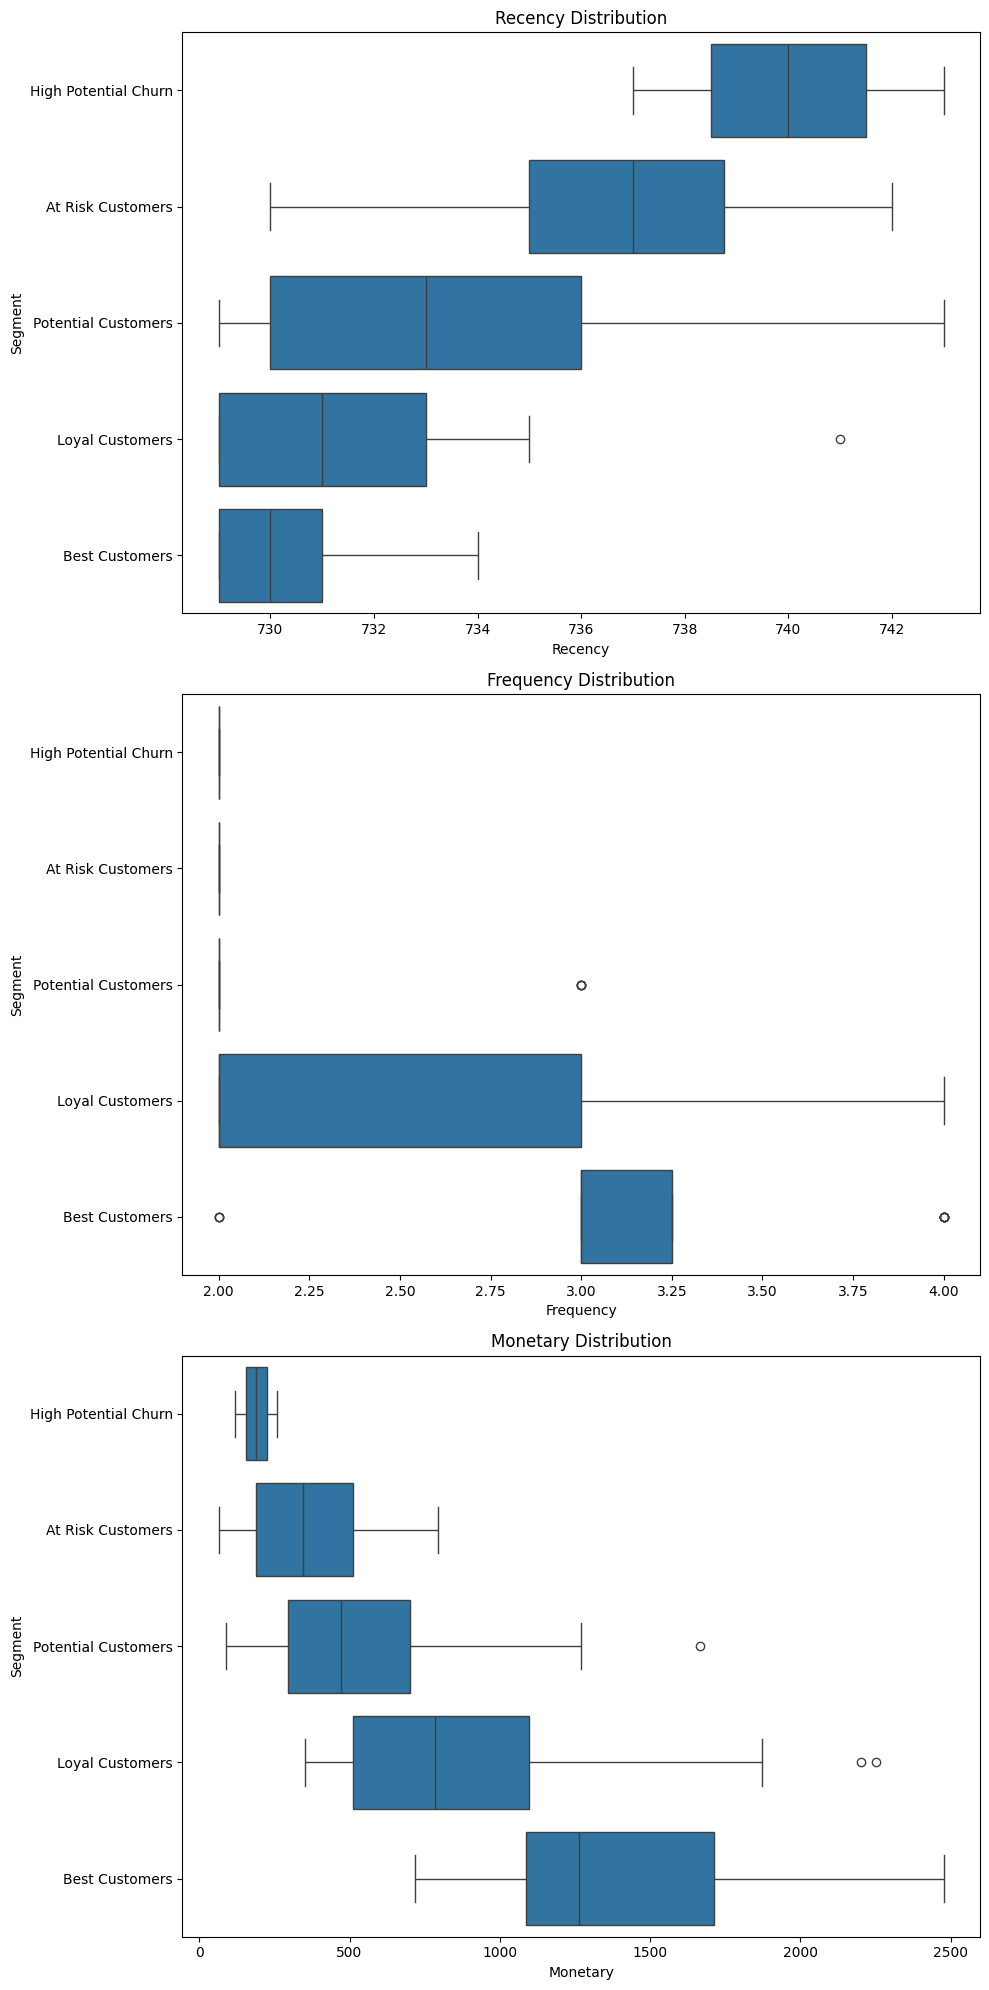

In [91]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_bin,
                y = 'Segment',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [92]:
data_bin.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

<ipython-input-92-a16edce2729f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_bin.groupby('Segment').agg({'Recency':'mean',


,Recency,Frequency,Monetary
Segment,,,
High Potential Churn,740.00,2.00,189.35
At Risk Customers,737.10,2.00,360.25
Potential Customers,733.53,2.06,541.45
Loyal Customers,731.42,2.42,931.63
Best Customers,730.29,3.12,1391.10


**Best Customers** <br>

---

Characteristic: <br>
- low recency,  high frequency, and high monetary value
- Recency: 33 days
- Frequency: 9 transactions
- Monetary: \$ 2839

Marketing initiative: <br>
- Provide dedicated account managers or personalized support to cater to their specific needs
- Offer personalized product recommendations based on their past purchases

**Loyal Customers** <br>

---

Characteristic: <br>
- medium recency, medium frequency, and  high monetary value
- Recency: 89 days
- Frequency: 6 transactions
- Monetary: \$ 1661

Marketing initiative: <br>
- Implement a customer loyalty program with tiered rewards and exclusive benefits
- Provide referral incentives to encourage them to refer friends and family to your business
**Potential Customers** <br>

---

Characteristic: <br>
- medium recency, medium frequency, and  medium monetary
- Recency: 156 days
- Frequency: 3 transactions
- Monetary: \$ 889

Marketing initiative: <br>
- Offer free trials, demos, or introductory discounts to encourage them to try your products or services

**At Risk Customers** <br>

---

Characteristic: <br>
-  high recency, low monetary, and low frequency
- Recency: 291 days
- Frequency: 3 transactions
- Monetary: \$ 506

Marketing initiative: <br>
- Conduct customer satisfaction surveys to identify and address any issues that may be causing their dissatisfaction
- Use discount promotional campaign to attract them make transaction

**High Potential Churn** <br>

---

Characteristic: <br>
- high recency, low frequency, and low monetary
- Recency: 484 days
- Frequency: 2 transactions
- Monetary: \$ 486

Marketing initiative: <br>
- Conduct surveys or feedback campaigns to understand their needs and preferences better
- Implement a proactive customer outreach program to address any concerns or issues they may have

## **6.2 K-means Clustering**
---
1. Elbow method
2. K-means clustering

In [93]:
from sklearn.cluster import KMeans

In [94]:
data_cluster_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

In [95]:
# Set empty list
inertia = []

# iterate for
for k in range(1, 11):
    # create
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # fit object
    kmeans.fit(data_cluster_clean)

    # append results
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

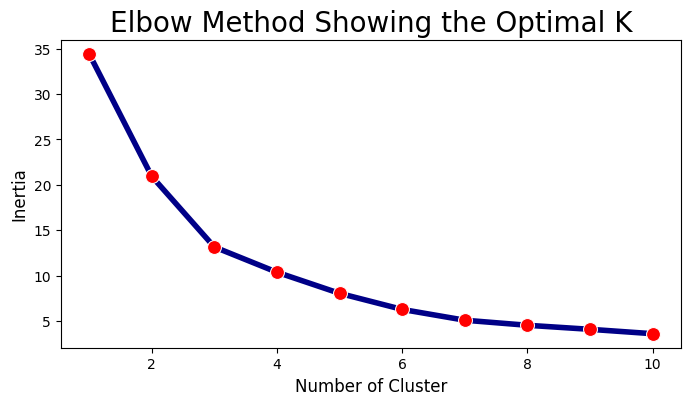

In [96]:
plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

**Review elbow method**

---

- The optimal number of clusters is the point where adding another cluster does not significantly decrease WCSS
- This point can be found by looking for a sharp bend or elbow in the WCSS graph
- If so, then adding more clusters does not improve the clustering performance

$$
\text{WCSS} = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_{(ij)} - c_{(j)}||^2
$$

where:
- n represents the total number of data points
- k represents the total number of clusters
- xi represents the ith data point
- cj represents the jth cluster centroid

**Elbow method analysis**

---

- We can see that there's no 'sharp bending' in the plot
- It's approximately between `n_cluster 2` or `n_cluster 3`
- we don't decide the number of cluster needed based on elbow method **only**, we should consinder the business needs
- If we decide to cluster into 2 group, there's some drawbacks:
    - Lack of granularity: With only two clusters, your customer segmentation becomes overly simplified, resulting in a lack of granularity. This can make it difficult to target specific customer groups effectively
    - Ineffective messaging: Limited segmentation may lead to generalized marketing messages that do not resonate well with either cluster
- So, we consider to use either `n_cluster` = 3 or `n_cluster` = 4, because our budget is still sufficient to cover until 5 clusters (based on assumption in RFM ranking method above)
- **We can decide using** `n_cluster = 3`, because we can't see 'beding curve' on `n_cluster = 4` and `n_cluster = 5`


### **6.2.1 K-Means Clustering**

---
- We want to cluster using K-Means with `n_cluster = 3`
- Find the centroids coordinate for clusters



In [97]:
# Refit best data
kmeans_best = KMeans(n_clusters = 3,
                     random_state = 42,
                     n_init = 10) # Number of times the k-means algorithm will be run with different initial centroids

# fit
kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [98]:
# Predict
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1], dtype=int32)

In [99]:
# Get the coordinates of the centroids
centroids = kmeans_best.cluster_centers_

In [100]:
# create dataframe
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

# show dataframe centroid
centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.635854,9.803922e-03,0.186383
1,0.135238,-1.665335e-16,0.261383
2,0.181319,6.282051e-01,0.428069


### **6.2.2 Analysis**

---

In [101]:
# Inverse transform data
data_cluster = pd.DataFrame(scaler.inverse_transform(data_clean))
data_cluster.index = data_clean.index
data_cluster.columns = data_clean.columns

# Build data
data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,Recency,Frequency,Monetary,label
Customer ID,,,,
12346,730.0,3.0,90.00,2
12747,735.0,2.0,683.85,0
12748,729.0,3.0,821.04,2
12835,730.0,4.0,936.01,2
12839,730.0,2.0,602.16,1


In [102]:
# Calculate average values for each RFM_Level, and return a size of each segment
data_cluster.groupby('label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,737.9,2.0,514.1,51
1,730.9,2.0,695.1,75
2,731.5,3.3,1097.3,39


In [103]:
# Function to assign label
def assign_label(val):
    """Function to assign label"""
    if val == 0:
        return 'Average Customer'
    elif val == 1:
        return 'At Risk Customer'
    else:
        return 'Best Customer'

# Create a new column 'Customer_Type' based on 'K_cluster' values
data_cluster['Customer_Type'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer ID,,,,,
12346,730.0,3.0,90.00,2,Best Customer
12747,735.0,2.0,683.85,0,Average Customer
12748,729.0,3.0,821.04,2,Best Customer
12835,730.0,4.0,936.01,2,Best Customer
12839,730.0,2.0,602.16,1,At Risk Customer


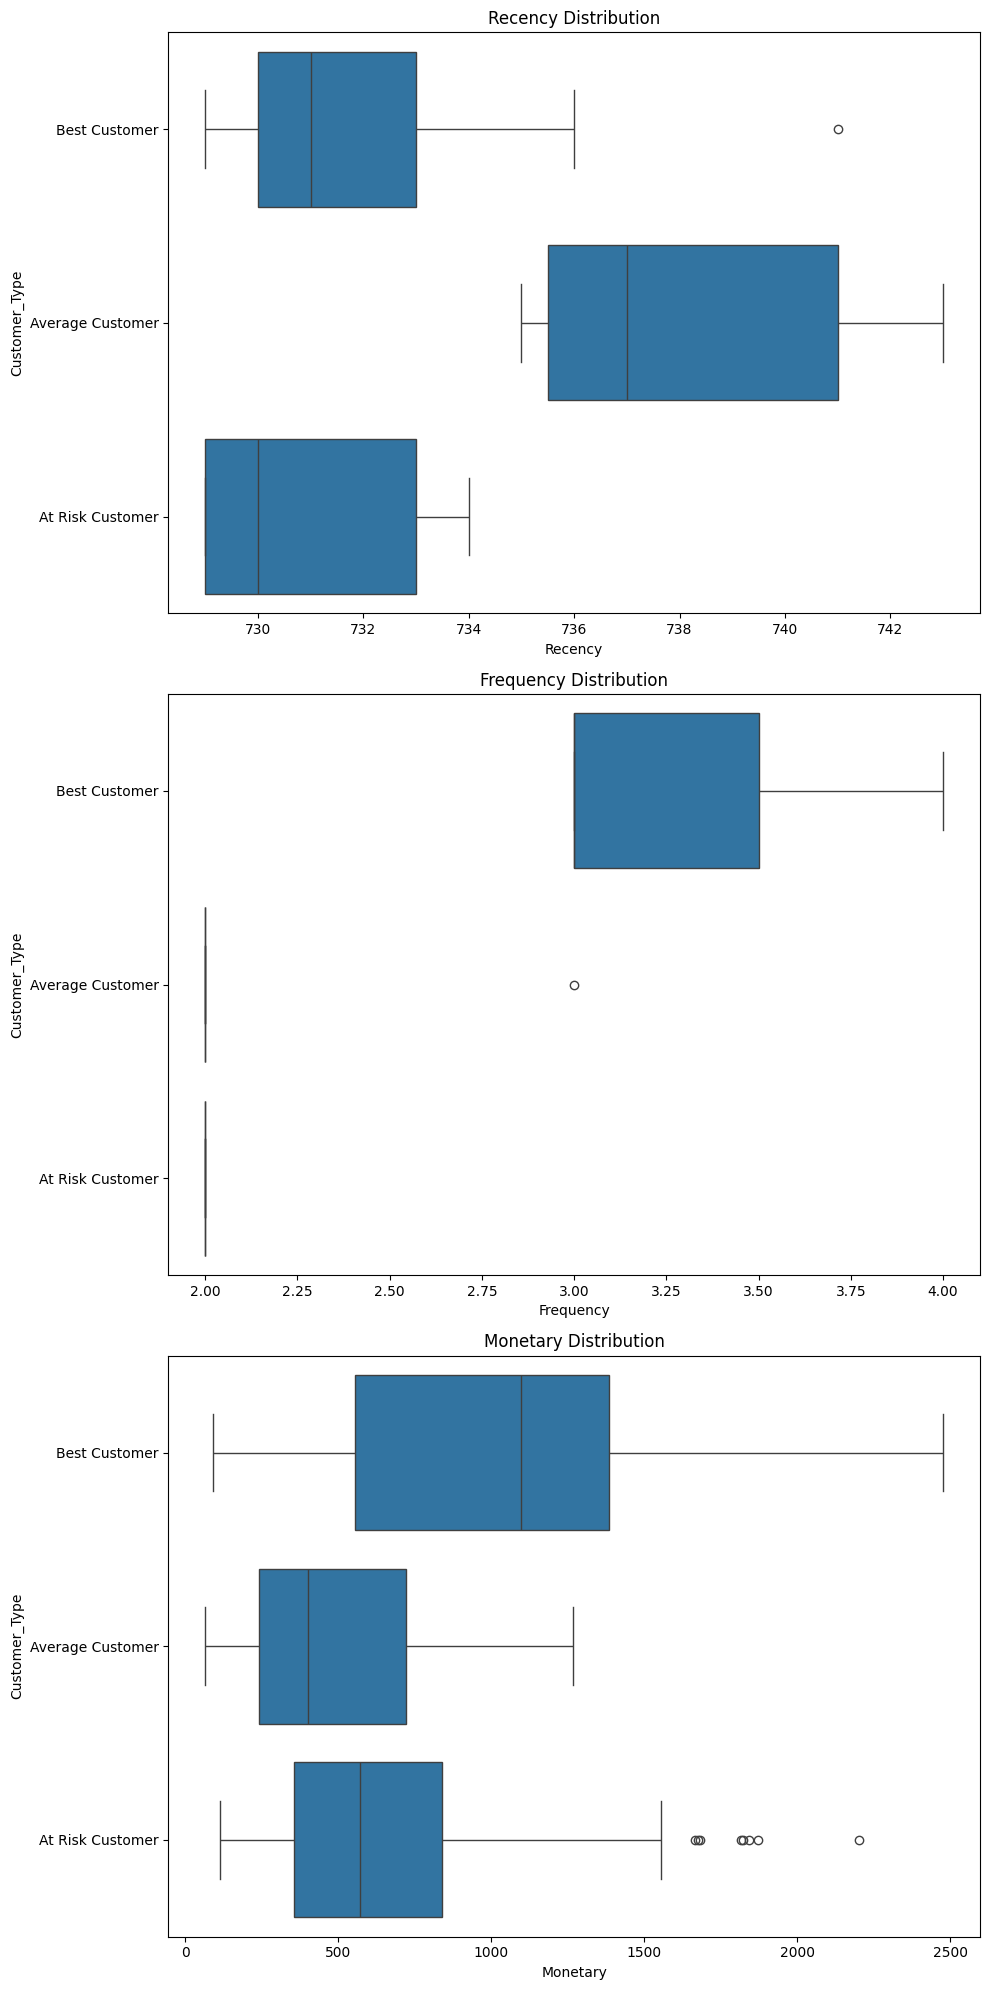

In [104]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_cluster,
                y = 'Customer_Type',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

**Best Customers**

---

- General Characteristic (Low recency, high frequency & monetary)
  - Recency : 70 days
  - Frequency : 9 transactions
  - Monetary : \$ 2775

- General marketing initiatives:
  - Provide dedicated account managers or personalized support to cater to their specific needs
  - Offer personalized product recommendations based on their past purchases
  - Implement a customer loyalty program with tiered rewards and exclusive benefits

  **Average Customers**

---

- General Characteristic (Low recency, medium frequency & monetary)
  - Recency : 77 days
  - Frequency : 4 transactions (specifically 3.7 transactions)
  - Monetary : \$ 915


- General marketing initiatives:
  - Offer free trials, demos, or introductory discounts to encourage them to try your products or services

  **At Risk Customers**

---

- General Characteristic (high recency, low frequency & monetary)
  - Recency : 421 days
  - Frequency : 3 transactions (specifically 3.1 transactions)
  - Monetary : \$ 761


- General Marketing initiative:
  - Conduct surveys or feedback campaigns to understand their needs and preferences better
  - Implement a proactive customer outreach program to address any concerns or issues they may have
  - Use discount promotional campaign to attract them make transaction

  # <font color='Blue'> **7. In Depth Analysis & Recommendation**
---

- We want to perform a more specific analysis of the RFM data.
- We want to conduct an analysis and take various conditions into consideration, such as short-term and long-term games, when making specific recommendations.
- Identify suitable business recommendations and implement marketing initiatives based on the analysis

In [105]:
# Apply inverse scaling to the data_clean DataFrame
data_clean_ori = pd.DataFrame(scaler.inverse_transform(data_clean))

# Assign the original index to the new DataFrame
data_clean_ori.index = data_clean.index

 # Assign the original column names to the new DataFrame
data_clean_ori.columns = data_clean.columns

In [106]:
# show the clean data
data_clean_ori.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,730.0,3.0,90.00
12747,735.0,2.0,683.85
12748,729.0,3.0,821.04
12835,730.0,4.0,936.01
12839,730.0,2.0,602.16


## **8.1 In Depth Analysis**

---
- We want to know how most customers purchase behavior
- We want to make foundation for specific recommendation based on specific condition and segment

In [107]:
# show desc stats
data_clean_ori.describe()

,Recency,Frequency,Monetary
count,165.000000,165.00000,165.000000
mean,733.212121,2.30303,734.236970
std,3.935126,0.57831,525.317095
min,729.000000,2.00000,64.400000
25%,730.000000,2.00000,359.040000
50%,733.000000,2.00000,589.230000
75%,735.000000,2.00000,963.820000
max,743.000000,4.00000,2477.360000


Text(0.5, 1.0, 'Recency Distribution')

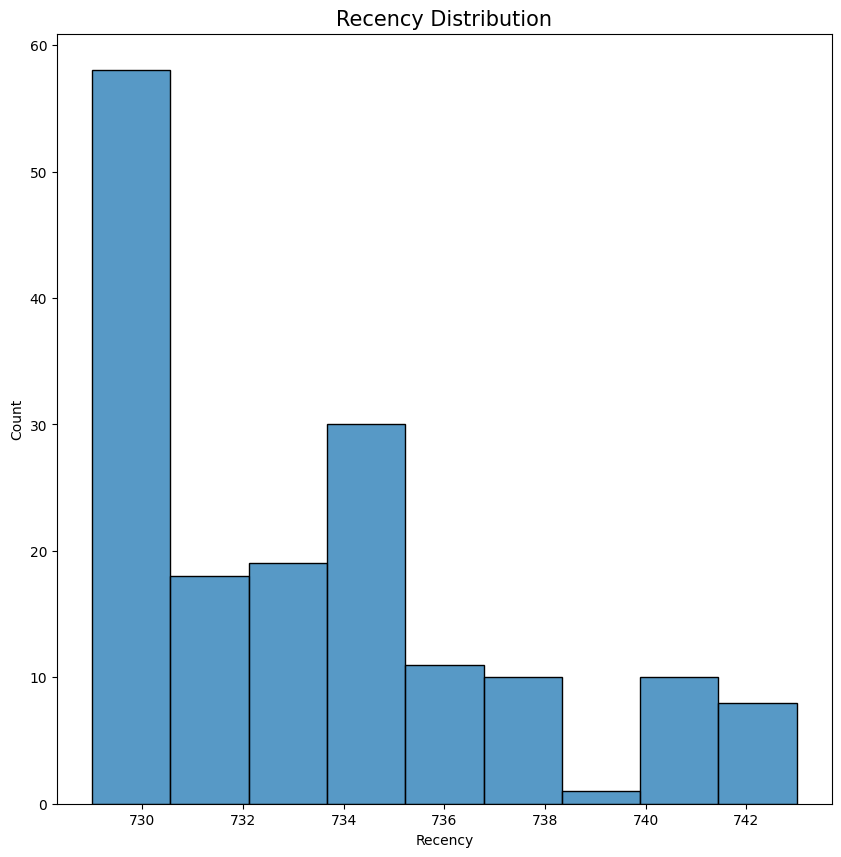

In [108]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Recency'])
plt.title('Recency Distribution', fontsize=15)

Text(0.5, 1.0, 'Monetary Distribution')

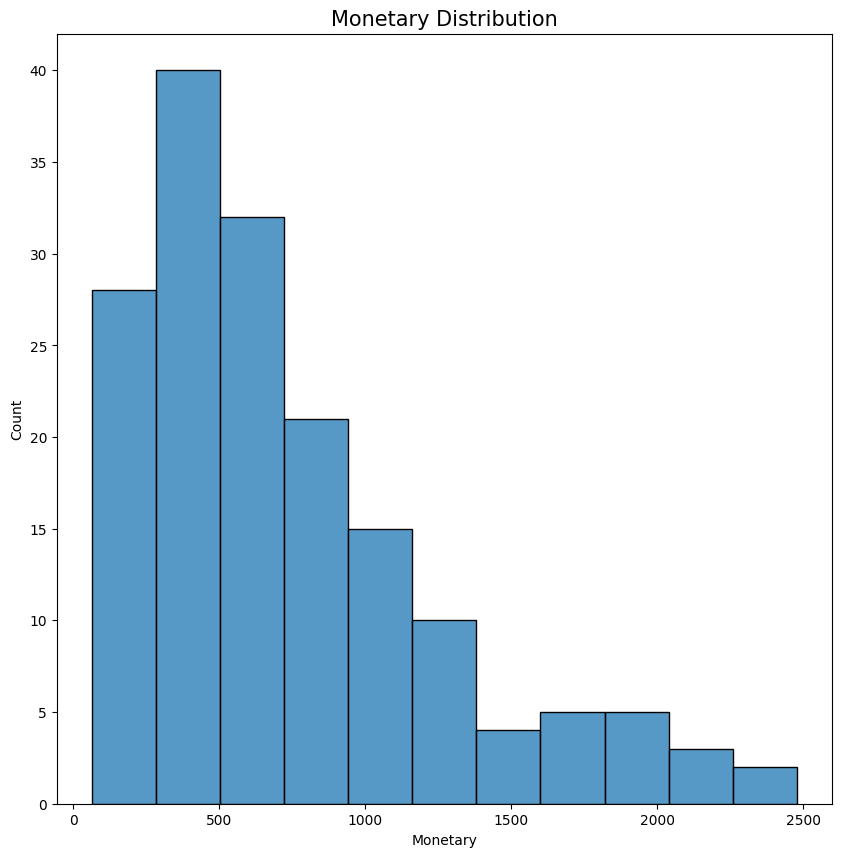

In [109]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)
#plt.xlim(0,40000)

Text(0.5, 1.0, 'Frequency Distribution')

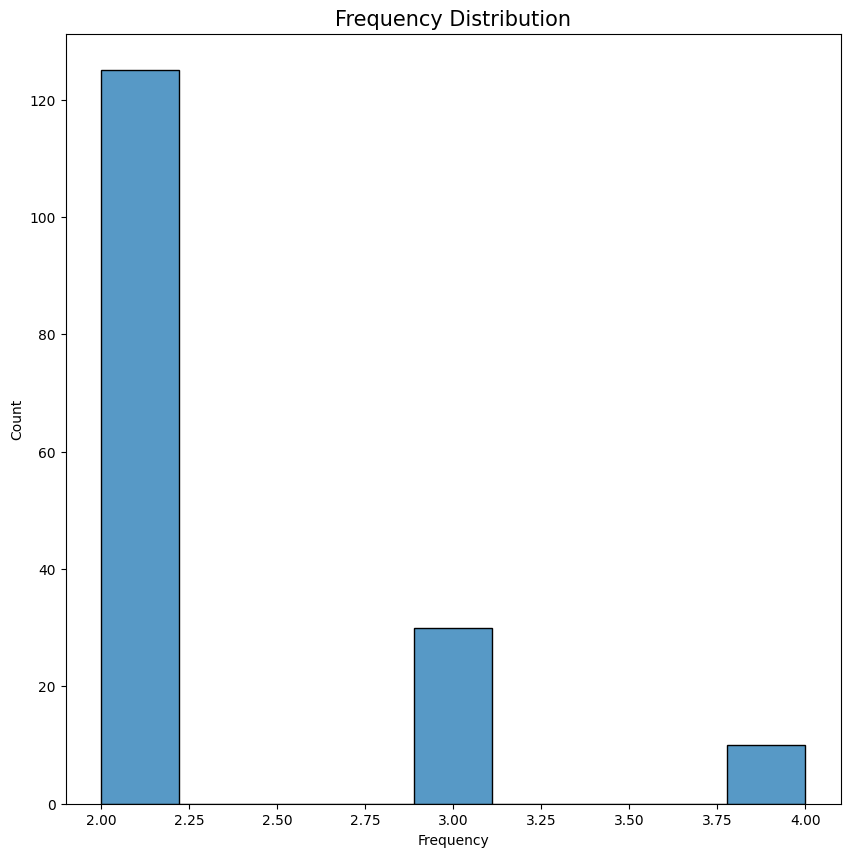

In [110]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=15)

In [111]:
# show clustered data
data_cluster.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer ID,,,,,
12346,730.0,3.0,90.00,2,Best Customer
12747,735.0,2.0,683.85,0,Average Customer
12748,729.0,3.0,821.04,2,Best Customer
12835,730.0,4.0,936.01,2,Best Customer
12839,730.0,2.0,602.16,1,At Risk Customer


In [112]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_datas_agg = data_cluster.groupby('Customer_Type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

# rename
rfm_datas_agg.columns = ['Recency', 'Frequency', 'Monetary', 'Count Customers']

In [113]:
# show data
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers
Customer_Type,,,,
At Risk Customer,730.9,2.0,695.1,75
Average Customer,737.9,2.0,514.1,51
Best Customer,731.5,3.3,1097.3,39


In [114]:
# create percentage revenue per segments
rfm_datas_agg['pctg revenue'] = np.round(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']/(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']).sum()*100,2)

#show data
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers,pctg revenue
Customer_Type,,,,,
At Risk Customer,730.9,2.0,695.1,75,43.03
Average Customer,737.9,2.0,514.1,51,21.64
Best Customer,731.5,3.3,1097.3,39,35.32


In [115]:
# create copy
customer_segments = data_cluster.copy().reset_index()

# use customer id and customer type
customer_segments = customer_segments[['Customer ID', 'Customer_Type']]

# show data
customer_segments.head()

,Customer ID,Customer_Type
0,12346,Best Customer
1,12747,Average Customer
2,12748,Best Customer
3,12835,Best Customer
4,12839,At Risk Customer


In [116]:
# copy data
trx_df = data.copy()

# drop missing values
trx_df = trx_df.dropna()

# make customer ID as int
trx_df['Customer ID'] = trx_df['Customer ID'].astype(int)

# show data
trx_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085


In [117]:
# check missing values
trx_df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0


In [118]:
# Merge the 'trx_df' DataFrame with the 'customer_segments' DataFrame on the 'Customer ID' column
trx_df = trx_df.merge(customer_segments[['Customer ID', 'Customer_Type']], on='Customer ID', how='left')

In [119]:
# check missing values
trx_df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Customer_Type,12736


In [120]:
# Let's check the missing value location
trx_df[trx_df['Customer_Type'].isna()].sample(5, random_state=41)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Customer_Type
15262,491678,85090,CANDY SPOT APRON,6.0,2009-12-13 12:11:00,4.65,16830,NaN
17923,492079,21667,GLASS CAKE COVER AND PLATE,1.0,2009-12-15 13:49:00,16.95,15070,NaN
17806,492075,85040A,S/4 PINK FLOWER CANDLES IN BOWL,1.0,2009-12-15 13:21:00,1.65,17596,NaN
5989,490298,79323P,PINK CHERRY LIGHTS,24.0,2009-12-04 14:13:00,5.45,15382,NaN
9443,490711,20782,CAMOUFLAGE EAR MUFF HEADPHONES,1.0,2009-12-07 15:26:00,5.49,17841,NaN


In [121]:
# let's check customer ID that missing in customer_segments data
customer_segments[customer_segments['Customer ID']==17364]


,Customer ID,Customer_Type
137,17364,At Risk Customer


In [122]:
# let's check customer ID that missing in customer_segments data 2
customer_segments[customer_segments['Customer ID']==16873]


,Customer ID,Customer_Type


In [123]:
# group by customer_type
grouped_segment = trx_df.groupby('Customer_Type').agg({'Price':['min','mean','max'],
                                                       'Quantity':['min','mean','max']})

# show the data
grouped_segment

Price                    Quantity                 
                   min      mean      max      min      mean    max
Customer_Type                                                      
At Risk Customer  1.06  4.006631  1213.02      1.0  7.996689  108.0
Average Customer  1.05  3.870625    79.95      1.0  7.133525  800.0
Best Customer     1.06  3.411080    45.95      1.0  8.757862  336.0

## **8.2 Recommendation for Short Term Game**
**Busienss Objective**
- Company ZYX amis to personalize marketing strategies to increase customer retention (achieve average monthly retention > 40%) and maximize revenue with effective marketing spending in the next 3 months
- The company also wants to identify high-value customers to give them personalized marketing

In short, we need to increase retention rate and revenue in short-term, in order to do that we need to treat our segment according their profile

**Best Customers**
- These customers are highly valuable to the business, and nurturing their loyalty is crucial
- They respond well to personalized marketing efforts and prefer exclusive rewards or benefits
- Focus to give marketing initiative to this segment, because >50% of our revenue is generated from this segments


we can create strategies, such as:
- Offer a loyalty program with tiered benefits and exclusive perks for top-tier customers
- Provide personalized product recommendations based on their purchase history
- Send personalized thank-you notes or special offers to show appreciation for their continued support
- Launch targeted cross-selling or upselling campaigns to increase their average order value
- Prepare at least budget marketing for **757 person**
- Set promotion every 7-10 days once (because most of your customer recency is 10 days based on the histogram)
- You can also make promotion every 3 months (average frequency is 9 in 2 years transaction, at least they make purchase every 3 months)


**Average Customers**
- This segment represents customers who make regular purchases but with moderate order values. They exhibit a moderate level of loyalty
- Second driver revenue generation, focus to treat this segment
- **Note**: in short term you should focus to give marketing initiative in **best & average customer**, because they generate > 85% of your revenue

We can treat them by:
- Createing time-limited promotions or limited-time offers to drive urgency and encourage additional purchases
- Developing product bundles or packages to increase their average order value
- You can bundle product with /$6 prices total (it's not applied for all product, choose the right product to be bundled, or you can use **Market Basket Analysis**)
- Offer them every 7-10 days with bundling offering and offer them discount price promotion, because they typically more sentitive to price than at risk customers

**At Risk Customers**
- This segment includes customers who have shown a decline in their purchasing activity or engagement with the company
- They may have had infrequent purchases or lower order values
- **Because it's just 15% revenue contributor, you don't need too focus in this segment in a short term**, consider your marketing budget

We can give them marketing initiative to prevent from churning:

- But you can still prevent them from churning if you have enough budget
- Implement triggered email campaigns to re-engage them based on specific customer actions or inactivity
- Conduct customer surveys or feedback requests to understand their concerns and address them promptly
- Offer personalized customer support or assistance to resolve any issues they may have encountered
- They like to buy more expensive product rather than other segment, but at risk customer segment also love with discount promotion
- They love discount / cashback promotion, offer them more frequent to keep them for making transaction
## **8.3 Recommendation for Long Term Game**
If the companies wants to implement marketing strategy for a longer period, they can implement these strategies:

**Best Customers**
- Create a customer advocacy program where loyal customers can become brand ambassadors and refer new customers
- Organize exclusive events or experiences for top-tier customers to strengthen their emotional connection with the brand
- These 2 strategies will have impact to increase their customer lifetime values
- In long term, it's important to make loyalty program based on segment, you can assign label **platinum** loyalty program in this segment
- Offer benefit free shiping if they can keep making transaction with us every 7 days a once (most of customer recency is 7-10 days based on histogram)


**Average Customers**
- Send regular newsletters or targeted emails with valuable content and special promotions to keep them "alive" for making transaction
- Offer them loyalty program for **Gold** tier
- You can offer them many benefit if they can keep making transaction with us every 10 days (minimum)
- you can implement short term recommendation also to keep them making transaction

**At Risk Customers**
- Implement a customer retention program that offers ongoing benefits and rewards for their continued loyalty (e.g., loyalty program for at risk customers)
- Regularly communicate with them through targeted email campaigns, social media engagement, or personalized direct mail
- Offer them **Sliver** loyalty program, with many benefit (such as free shiping) if they keep making transaction with us every 3 weeks a once (minimum)
